In [1]:
#import libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as mlt
import seaborn as sns 

In [5]:
#import dataset

In [7]:
df=pd.read_csv("E:/swedish_insurance.csv")

In [9]:
df.head()

,X,Y
0,124,422.2
1,108,392.5
2,61,217.6
3,60,202.4
4,57,170.9


In [11]:
df.tail()

,X,Y
58,3,4.4
59,3,13.2
60,3,39.9
61,2,6.6
62,0,0.0


In [13]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [15]:
df.rename(columns={'Y':'Payment'},inplace=True)
df.head()

,X,Payment
0,124,422.2
1,108,392.5
2,61,217.6
3,60,202.4
4,57,170.9


In [17]:
#check null values 

In [19]:
print('null values in dataset:\n',df.isnull().sum())

null values in dataset:
 X          0
Payment    0
dtype: int64


In [21]:
#check duplicates

In [23]:
duplicates = df[df.duplicated()]

In [25]:
df = df.drop_duplicates()

In [27]:
df[df.duplicated(subset=['Payment'])]

,X,Payment
48,7,77.5


In [29]:
df

,X,Payment
0,124,422.2
1,108,392.5
2,61,217.6
3,60,202.4
4,57,170.9
...,...,...
58,3,4.4
59,3,13.2
60,3,39.9
61,2,6.6


In [31]:
#graphs

C:\Users\ayushi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ayushi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_layput'

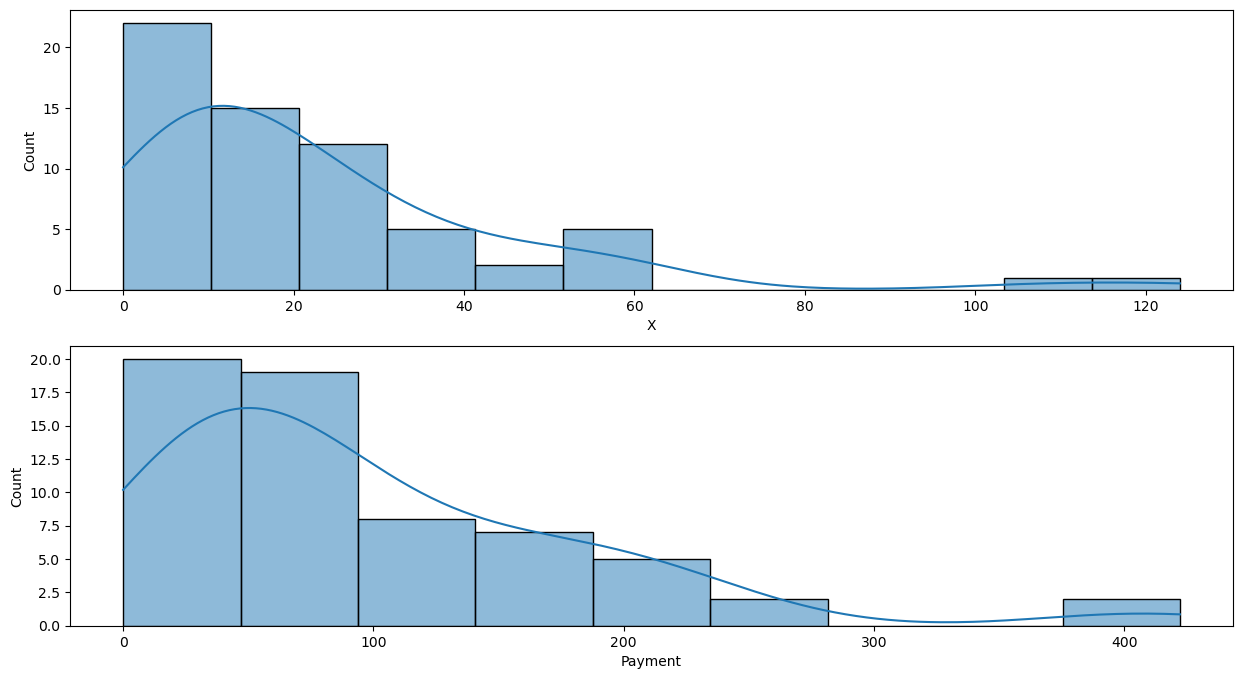

In [33]:
mlt.figure(figsize=(15,8))
mlt.subplot(2,1,1)
sns.histplot(df['X'],kde=True)
mlt.subplot(2,1,2)
sns.histplot(df['Payment'],kde=True)
mlt.tight_layput()
mlt.show()

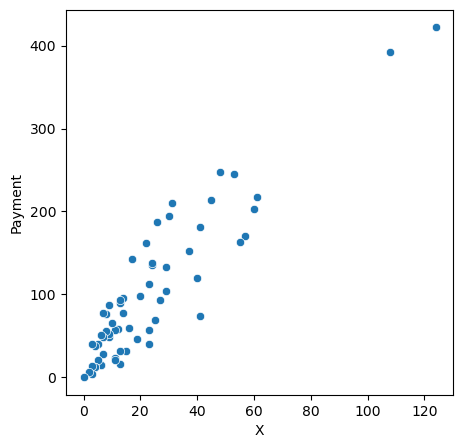

In [36]:
mlt.figure(figsize=(5,5))
sns.scatterplot(x='X',y="Payment",data=df)
mlt.show()

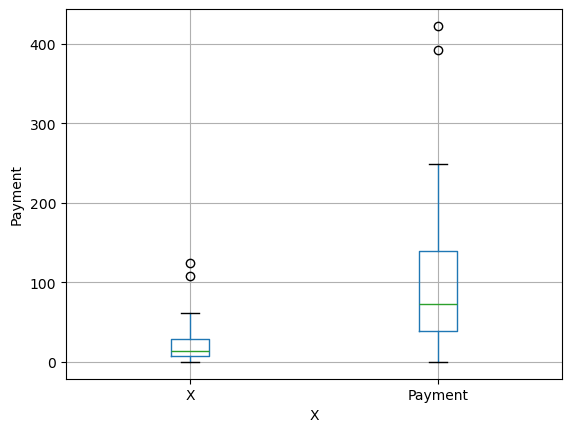

In [38]:
df.boxplot()
mlt.xlabel('X')
mlt.ylabel('Payment')
mlt.show()

<Axes: xlabel='X', ylabel='Payment'>

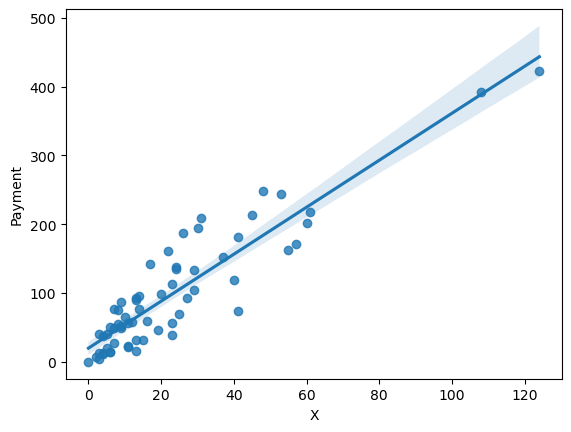

In [40]:
sns.regplot(x='X', y='Payment', data=df)

C:\Users\ayushi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ayushi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


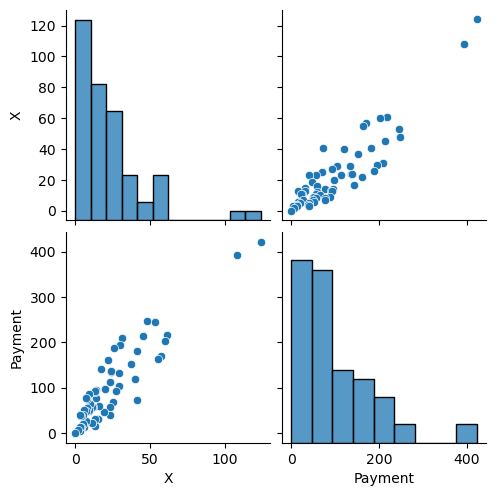

In [41]:
sns.pairplot(df)


In [44]:
#impute outlier: replace outlier with reasonable value (mean,median,mode)

In [46]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X'].quantile(0.25)
Q3 = df['Payment'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Replace outliers with the median
df.loc[df['X'] > upper_bound, 'X'] = df['X'].median()
df.loc[df['Payment'] < lower_bound, 'Payment'] = df['Payment'].median()


In [48]:
df['X'].median()

14.0

In [50]:
df['Payment'].median()

73.4

In [52]:
#train test data

In [54]:
x=df[['X']]
y=df['Payment']

In [56]:
x

,X
0,124
1,108
2,61
3,60
4,57
...,...
58,3
59,3
60,3
61,2


In [58]:
y

0     422.2
1     392.5
2     217.6
3     202.4
4     170.9
      ...  
58      4.4
59     13.2
60     39.9
61      6.6
62      0.0
Name: Payment, Length: 63, dtype: float64

In [60]:
#spliiting data

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=52)

In [66]:
x_train,x_test,y_train,y_test

(     X
 34  13
 14  30
 20  24
 38  11
 7   48
 57   4
 36  13
 39  11
 12  37
 15  29
 51   6
 16  29
 62   0
 47   7
 48   7
 33  13
 49   7
 35  13
 27  19
 60   3
 42   9
 5   55
 32  14
 55   4
 61   2
 22  23
 23  23
 13  31
 11  40
 28  17
 53   5,
       X
 46    8
 52    6
 2    61
 8    45
 4    57
 54    5
 3    60
 45    8
 26   20
 56    4
 58    3
 40   11
 43    9
 19   25
 59    3
 31   14
 25   22
 9    41
 17   27
 24   23
 30   15
 21   24
 41   10
 37   12
 6    53
 29   16
 44    9
 18   26
 1   108
 50    6
 0   124
 10   41,
 34     89.9
 14    194.5
 20    134.9
 38     23.5
 7     248.1
 57     12.6
 36     31.9
 39     57.2
 12    152.8
 15    103.9
 51     14.8
 16    133.3
 62      0.0
 47     48.8
 48     77.5
 33     15.7
 49     27.9
 35     93.0
 27     46.2
 60     39.9
 42     48.7
 5     162.8
 32     95.5
 55     11.8
 61      6.6
 22     56.9
 23     39.6
 13    209.8
 11    119.4
 28    142.1
 53     20.9
 Name: Payment, dtype: float64,
 46     55

In [68]:
#model implement

In [70]:
from sklearn.linear_model import LinearRegression
# Define the model
model = LinearRegression()

In [72]:
# Define the feature matrix (X) and target vector (y)
X = df[['X']]  # Example: df[['X']] for the input feature(s)
Y = df['Payment']     # Example: df['Y'] for the target variable

In [74]:
# Fit the model to the data
model.fit(X, Y)


LinearRegression()

In [76]:
#prediction

In [78]:
from sklearn.metrics import accuracy_score

In [80]:
y_pred=model.predict(x_test)

In [82]:
y_pred

array([ 47.30507424,  40.47742712, 228.23772292, 173.61654596,
       214.58242868,  37.06360356, 224.82389936,  47.30507424,
        88.27095696,  33.64978   ,  30.23595644,  57.54654492,
        50.7188978 , 105.34007476,  30.23595644,  67.7880156 ,
        95.09860408, 159.96125172, 112.16772188,  98.51242764,
        71.20183916, 101.9262512 ,  54.13272136,  60.96036848,
       200.92713444,  74.61566272,  50.7188978 , 108.75389832,
       388.68743025,  40.47742712, 443.30860721, 159.96125172])

In [84]:
model.score(x_test,y_test)

0.8885196314134528

In [ ]:
#model evaluation

In [98]:
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
y_pred = model.predict(x_test)

In [102]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1397.22


In [104]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

R-squared (R²): 0.86


In [79]:
print('Shape of df[\'X\']:', df['X'].shape)
print('Shape of y_pred:', y_pred.shape)


Shape of df['X']: (63,)
Shape of y_pred: (32,)


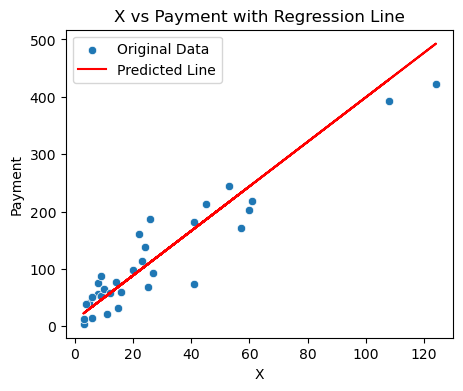

In [92]:

# Fit the model
model.fit(x_train, y_train)

# Generate predictions on the test set
y_pred = model.predict(x_test)

# Plotting
mlt.figure(figsize=(5, 4))
sns.scatterplot(x=x_test.squeeze(), y=y_test, label='Original Data')
mlt.plot(x_test.squeeze(), y_pred, color='red', label='Predicted Line')
mlt.legend()
mlt.xlabel('X')
mlt.ylabel('Payment')
mlt.title('X vs Payment with Regression Line')
mlt.show()


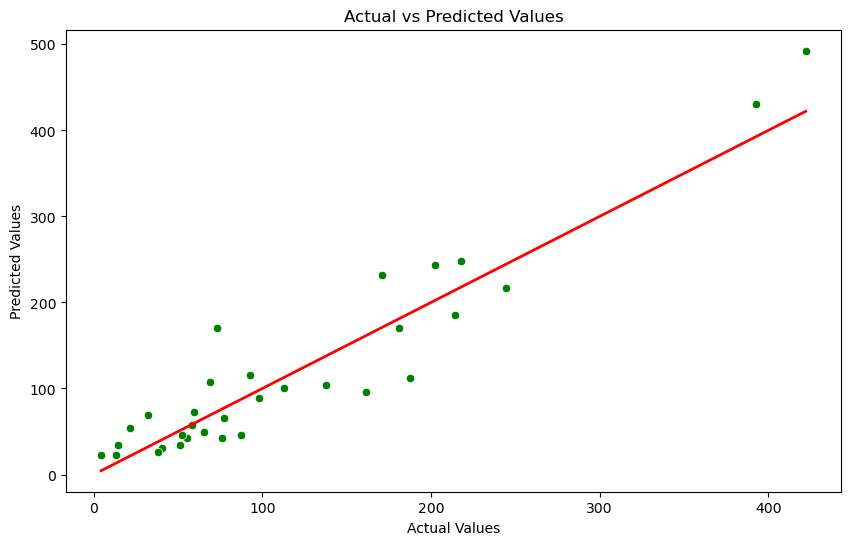

In [150]:
# Create Actual vs. Predicted Plot
mlt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
mlt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2) # y = x line
mlt.xlabel('Actual Values')
mlt.ylabel('Predicted Values')
mlt.title('Actual vs Predicted Values')
mlt.show()

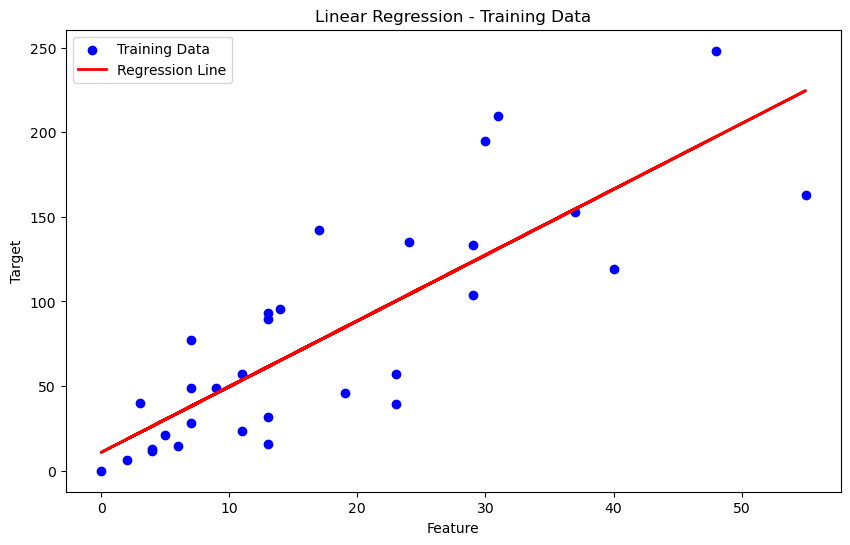

In [154]:
mlt.figure(figsize=(10,6))
mlt.scatter(x_train, y_train, color='blue', label='Training Data')
mlt.plot(x_train, model.predict(x_train), color='red', linewidth=2, label='Regression Line')
mlt.xlabel('Feature')
mlt.ylabel('Target')
mlt.title('Linear Regression - Training Data')
mlt.legend()
mlt.show()
